In [1]:
!pip uninstall -y tensorflow
!pip install tensorflow==2.19.0

Found existing installation: tensorflow 2.19.0
Uninstalling tensorflow-2.19.0:
  Successfully uninstalled tensorflow-2.19.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.0/645.0 MB 1.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50, InceptionV3, EfficientNetB0
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet
from tensorflow.keras.applications.inception_v3 import preprocess_input as preprocess_inception
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_effnet
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.preprocessing import image

Загрузка моделей

In [3]:
models = {
    "ResNet50": (ResNet50(weights='imagenet'), (224, 224), preprocess_resnet),
    "InceptionV3": (InceptionV3(weights='imagenet'), (299, 299), preprocess_inception),
    "EfficientNetB0": (EfficientNetB0(weights='imagenet'), (224, 224), preprocess_effnet)
}

def classify_image(img_path, model_name="ResNet50", top_n=5):
    model, img_size, preprocess = models[model_name]

    img = image.load_img(img_path, target_size=img_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess(x)

    preds = model.predict(x)
    results = decode_predictions(preds, top=top_n)[0]

    plt.figure(figsize=(6, 6))
    plt.imshow(image.load_img(img_path))
    plt.axis('off')
    plt.title(f"Prediction: {results[0][1]} ({results[0][2]:.3f})")
    plt.show()

    print(f"\n=== {model_name} ===")
    for i, (class_id, label, prob) in enumerate(results, 1):
        print(f"{i:2}. {label:20} → {prob:.4f}")

    return results

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
21834768/21834768 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Фотографии загружены в коллаб

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


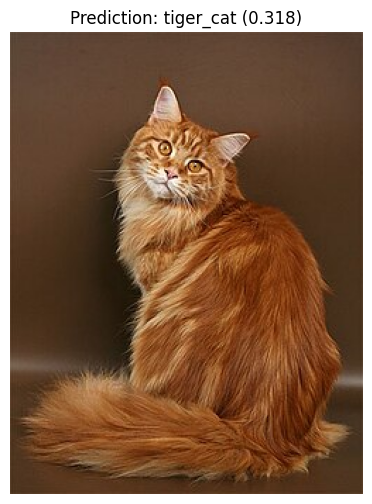


=== ResNet50 ===
 1. tiger_cat            → 0.3184
 2. tabby                → 0.2704
 3. Egyptian_cat         → 0.1467
 4. lynx                 → 0.0791
 5. Persian_cat          → 0.0361
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


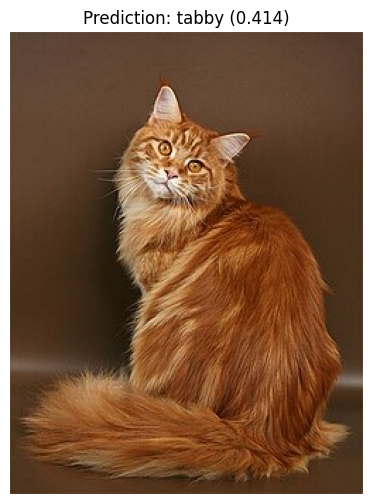


=== InceptionV3 ===
 1. tabby                → 0.4140
 2. Egyptian_cat         → 0.1775
 3. tiger_cat            → 0.0981
 4. Persian_cat          → 0.0613
 5. lynx                 → 0.0342
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


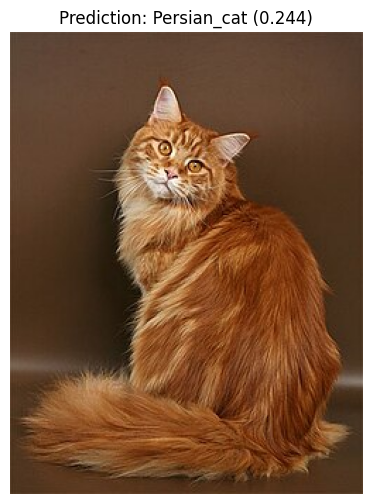


=== EfficientNetB0 ===
 1. Persian_cat          → 0.2438
 2. tiger_cat            → 0.1798
 3. tabby                → 0.1293
 4. lynx                 → 0.0764
 5. Egyptian_cat         → 0.0442


[('n02123394', 'Persian_cat', np.float32(0.24375223)),
 ('n02123159', 'tiger_cat', np.float32(0.17975083)),
 ('n02123045', 'tabby', np.float32(0.12933645)),
 ('n02127052', 'lynx', np.float32(0.07635421)),
 ('n02124075', 'Egyptian_cat', np.float32(0.044187058))]

In [4]:
classify_image("cat.jpg", model_name="ResNet50")
classify_image("cat.jpg", model_name="InceptionV3")
classify_image("cat.jpg", model_name="EfficientNetB0")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


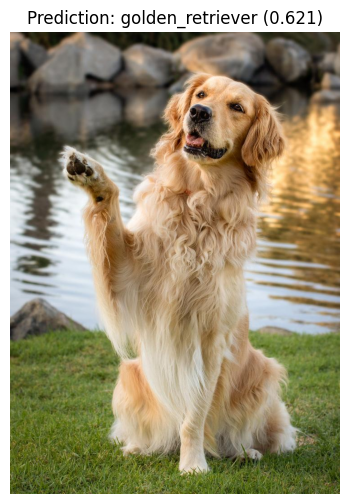


=== ResNet50 ===
 1. golden_retriever     → 0.6211
 2. cocker_spaniel       → 0.1709
 3. Welsh_springer_spaniel → 0.0508
 4. llama                → 0.0208
 5. Arabian_camel        → 0.0167
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


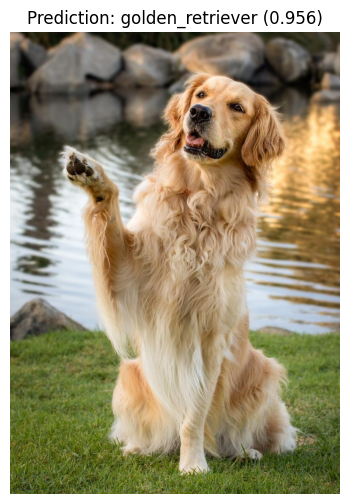


=== InceptionV3 ===
 1. golden_retriever     → 0.9564
 2. Labrador_retriever   → 0.0046
 3. clumber              → 0.0026
 4. Brittany_spaniel     → 0.0020
 5. collie               → 0.0012
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


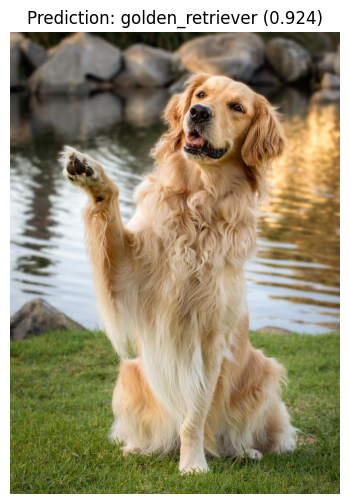


=== EfficientNetB0 ===
 1. golden_retriever     → 0.9240
 2. cocker_spaniel       → 0.0120
 3. Welsh_springer_spaniel → 0.0054
 4. Labrador_retriever   → 0.0032
 5. clumber              → 0.0025


[('n02099601', 'golden_retriever', np.float32(0.9240403)),
 ('n02102318', 'cocker_spaniel', np.float32(0.011961928)),
 ('n02102177', 'Welsh_springer_spaniel', np.float32(0.00543294)),
 ('n02099712', 'Labrador_retriever', np.float32(0.003220094)),
 ('n02101556', 'clumber', np.float32(0.0024911154))]

In [6]:
classify_image("golden_retriver.jpg", model_name="ResNet50")
classify_image("golden_retriver.jpg", model_name="InceptionV3")
classify_image("golden_retriver.jpg", model_name="EfficientNetB0")

Градиентная карта

In [7]:
!pip install tf-keras-vis --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.2 MB/s eta 0:00:00


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[('n02099601', 'golden_retriever', np.float32(0.9563907)), ('n02099712', 'Labrador_retriever', np.float32(0.0046072733)), ('n02101556', 'clumber', np.float32(0.002575441))]


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_731']]
Received: inputs=Tensor(shape=(1, 299, 299, 3))
  warnings.warn(msg)


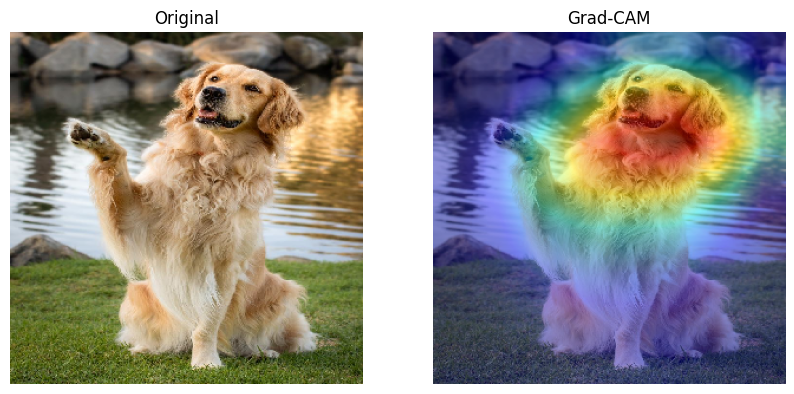

In [8]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Загружаем модель
model = InceptionV3(weights='imagenet')

# Загружаем картинку
img_path = 'golden_retriver.jpg'
# Correct target_size for InceptionV3
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Делаем предсказание
preds = model.predict(x)
print(decode_predictions(preds, top=3)[0])

# Grad-CAM
# Correct last convolutional layer name for InceptionV3
last_conv_layer = model.get_layer('mixed10')

grad_model = tf.keras.models.Model(
    [model.inputs],
    [last_conv_layer.output, model.output]
)

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(x)
    class_idx = tf.argmax(predictions[0])
    loss = predictions[:, class_idx]

grads = tape.gradient(loss, conv_outputs)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

conv_outputs = conv_outputs[0]
heatmap = tf.reduce_sum(conv_outputs * pooled_grads, axis=-1)
heatmap = tf.nn.relu(heatmap)
heatmap /= tf.reduce_max(heatmap) + 1e-8

# Делаем красивую картинку
heatmap = heatmap.numpy()
heatmap = cv2.resize(heatmap, (img.size[0], img.size[1]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

superimposed = cv2.addWeighted(np.array(img), 0.6, heatmap, 0.4, 0)

# Показываем
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(superimposed)
plt.axis('off')
plt.title('Grad-CAM')

plt.show()